In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew



In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Data preprocessing

In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
print(df['ph'].nunique())
print(df['Sulfate'].nunique())
print(df['Trihalomethanes'].nunique())

2785
2495
3114


In [5]:
df_columns = ['ph','Sulfate','Trihalomethanes']
for i in df_columns:
    df[i] = df[i].fillna(df[i].mean())

In [6]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
# Calculate skewness for all numeric columns
skewness = df.skew()        # Values close to 0 → Normally distributed          
print(skewness)


ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64


### Insights from Skewness Analysis:

1) Values close to 0 → Normally distributed (e.g., ph, Hardness, Chloramines).

2) Positive Skew (>0.5) → Right-skewed (long right tail) (e.g., Solids, Potability).

3) Negative Skew (<-0.5) → Left-skewed (long left tail) (None in your case).

### Checking and eliminating outliers from my dataset using seaborn

<Axes: >

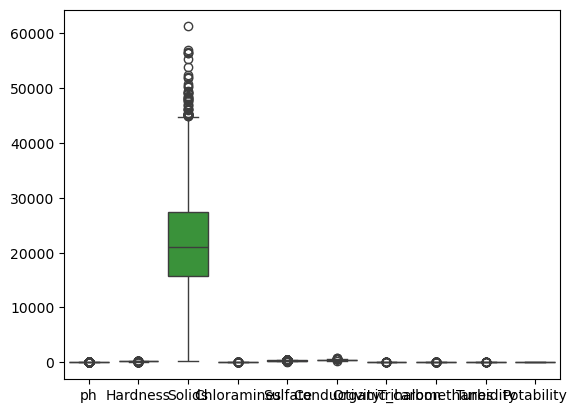

In [8]:
sns.boxplot(df)

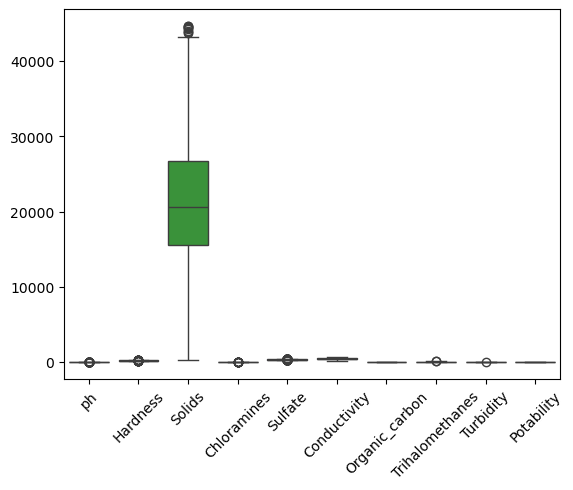

In [9]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Plot again to check
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


<Axes: >

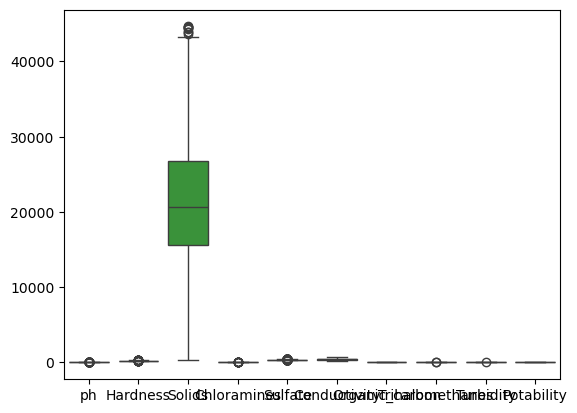

In [10]:
sns.boxplot(df)

### Dividing data into train and test using Train_test_split library

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) 

In [12]:
y = df['Potability']
X = df.drop('Potability',axis=1)

In [13]:
y

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

In [14]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [15]:
from sklearn.model_selection import train_test_split

In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [71]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2271,8.388322,256.234007,16795.820484,4.143519,333.775777,333.946197,10.821321,55.190219,3.854772
2748,4.951414,153.212150,20117.359061,8.985572,391.069045,418.330195,11.831691,68.387613,3.870681
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902
1173,6.320428,210.310043,11682.229317,6.968423,311.777822,375.964558,11.973422,62.960463,4.553381
1981,7.080795,209.751955,20214.216552,6.045078,323.788383,539.464723,20.278990,72.735207,4.258489
...,...,...,...,...,...,...,...,...,...
2003,7.880686,226.003844,19486.881839,6.208574,356.338079,472.369094,11.995239,55.029166,3.579984
1338,5.506062,164.496172,21543.726601,5.983996,333.775777,453.883340,13.339716,55.751362,2.778906
1378,7.499844,210.985034,23707.465304,7.148518,333.775777,484.843340,18.081957,52.967469,4.454477
1583,7.736313,225.063103,19496.848592,7.158343,289.945985,433.974022,15.153817,74.765101,3.700917


In [72]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2553,8.037761,199.213971,40368.420627,7.307411,333.775777,293.833466,14.254682,68.763418,3.572519
2347,5.429335,183.439383,15265.407564,5.714731,394.001195,446.879149,17.581557,50.266951,3.081736
605,6.492639,172.863960,14625.561363,7.736570,349.404057,652.537592,10.212058,56.949724,4.667770
2323,5.277876,166.733007,18404.050689,4.777124,333.775777,347.219457,15.526043,63.008668,3.632607
912,8.274069,195.803331,18091.202615,7.422104,365.407222,369.198334,16.996330,66.396293,2.575423
...,...,...,...,...,...,...,...,...,...
1459,6.867001,184.248496,14464.115547,6.759352,371.283819,497.703775,14.782861,73.433479,3.484121
1170,6.770927,181.818066,26880.220040,5.215862,284.745510,475.548960,14.665441,60.515772,4.910534
1044,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
1855,7.532059,185.506563,24454.725864,5.791102,333.775777,393.971890,15.070248,74.780643,3.808570


In [73]:
y_train

2271    0
2748    1
3106    0
1173    1
1981    1
       ..
2003    1
1338    0
1378    0
1583    1
1043    0
Name: Potability, Length: 2132, dtype: int64

#### Now training a machine learning model - i am using Logistic regreesion and Decison tree classifier and Random forest classifier so  whic will be best will be chosen 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [75]:
lgr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(
    n_estimators=200,        
    max_depth=20,           
    min_samples_split=2,     
    min_samples_leaf=1,    
    class_weight="balanced" 
)

In [76]:
lgr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200)

In [77]:
y_pred = lgr.predict(X_test)

In [102]:
print(lgr.score(X_train,y_train),lgr.score(X_test,y_test))
print(dt.score(X_train,y_train),dt.score(X_test,y_test))
print(rf.score(X_train,y_train),rf.score(X_test,y_test))

0.623358348968105 0.6404494382022472
1.0 0.5861423220973783
1.0 0.6647940074906367


In [120]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=10)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = xgb.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.6704119850187266
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       342
           1       0.58      0.30      0.40       192

    accuracy                           0.67       534
   macro avg       0.64      0.59      0.59       534
weighted avg       0.65      0.67      0.64       534



In [122]:
import numpy as np

# Example input (replace with actual values)
input_data = [[7.080794504276629,204.8904554713363,20791.318980747023,7.300211873184757,368.51644134980336,564.3086541722439,10.3797830780847,86.9909704615088,2.9631353806316407]]  # Replace with real feature values

# Convert to NumPy array (if needed)
input_array = np.array(input_data)

# Predict output
prediction = lgr.predict(input_array)

# Print result
print("Predicted Output:", prediction[0])


Predicted Output: 0


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [129]:
import numpy as np

# Example input (replace with actual feature values)
input_data = np.array([[8.137767883092494,203.8618673386868,24172.70331260775,6.844017626422233,305.83257968719704,470.83626451802894,19.232961414138344,30.708421300394185,5.003825786209145]])  # Add values as per your dataset

# Predict output using XGBoost
prediction = lgr.predict(input_data)

print("Predicted Output:", prediction[0])


Predicted Output: 0


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [131]:
import numpy as np

# Example input (replace with actual values)
input_data = [[8.137767883092494,203.8618673386868,24172.70331260775,6.844017626422233,305.83257968719704,470.83626451802894,19.232961414138344,30.708421300394185,5.003825786209145]]  # Replace with real feature values

# Convert to NumPy array (if needed)
input_array = np.array(input_data)

# Predict output using XGBoost
prediction = xgb.predict(input_array)

# If using XGBoost classifier, convert probabilities to class labels
predicted_class = [round(p) for p in prediction]

print("Predicted Output:", predicted_class[0])


Predicted Output: 1


6.273805781551276,191.8503964181032,15130.154367811052,5.112750509869737,349.9495295846939,538.2037133575559,12.383597205246076,52.09768737909524,4.5104053244440205

In [133]:
import numpy as np

# Example input (replace with actual values)
input_data = [[6.273805781551276,191.8503964181032,15130.154367811052,5.112750509869737,349.9495295846939,538.2037133575559,12.383597205246076,52.09768737909524,4.5104053244440205]]  # Replace with real feature values

# Convert to NumPy array (if needed)
input_array = np.array(input_data)

# Predict output using XGBoost
prediction = xgb.predict(input_array)

# If using XGBoost classifier, convert probabilities to class labels
predicted_class = [round(p) for p in prediction]

print("Predicted Output:", predicted_class[0])


Predicted Output: 0


## Conclusion

So i tried with Logistic regression but it is not giving any output so i used XGBoost model in which the model is predicting good

In [134]:
import pickle

# Save the trained XGBoost model
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb, file)

print("Model saved successfully!")


Model saved successfully!


In [135]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')